In [5]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

#cargamos los datos de entrada
wf1_data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_r.csv")
#veamos cuantas dimensiones y registros contiene
wf1_data_conv = wf1_data
wf1_data_conv.shape

# Ver los 1ros registros
wf1_data_conv.head()

,date,hors,u,v,ws,wd
0,2009070100,1,2.34,-0.79,2.47,108.68
1,2009070100,2,2.18,-0.99,2.40,114.31
2,2009070100,3,2.20,-1.21,2.51,118.71
3,2009070100,4,2.35,-1.40,2.73,120.86
4,2009070100,5,2.53,-1.47,2.93,120.13


In [11]:
# Agregar nuevos campos
wf1_data_conv['anno'] = wf1_data_conv['date']
wf1_data_conv.replace({'anno': wf1_data_conv['anno'][0:4] },  inplace = True)
wf1_data_conv.head()

,date,hors,u,v,ws,wd,anno
0,2009070100,1,2.34,-0.79,2.47,108.68,2009070100
1,2009070100,2,2.18,-0.99,2.40,114.31,2009070100
2,2009070100,3,2.20,-1.21,2.51,118.71,2009070100
3,2009070100,4,2.35,-1.40,2.73,120.86,2009070100
4,2009070100,5,2.53,-1.47,2.93,120.13,2009070100


In [12]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
count,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000
mean,24.575913,4.130725,144.727295,2009.662100,7.513508,15.712519,5.961187,0.246144
std,13.830534,1.913050,91.707991,0.473039,3.266211,8.854169,6.000445,0.234569
min,1.000000,0.070000,0.030000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,13.000000,2.807500,74.907500,2009.000000,5.000000,8.000000,0.000000,0.050000
50%,25.000000,3.705000,122.850000,2010.000000,8.000000,16.000000,0.000000,0.180000
75%,37.000000,5.200000,192.487500,2010.000000,10.000000,23.000000,12.000000,0.367250
max,48.000000,12.780000,359.890000,2010.000000,12.000000,31.000000,12.000000,0.947000


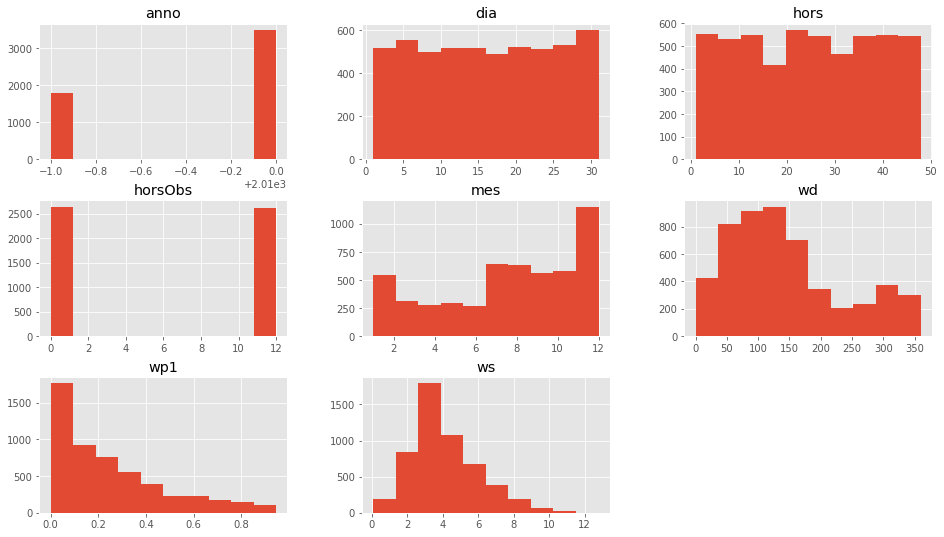

In [13]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

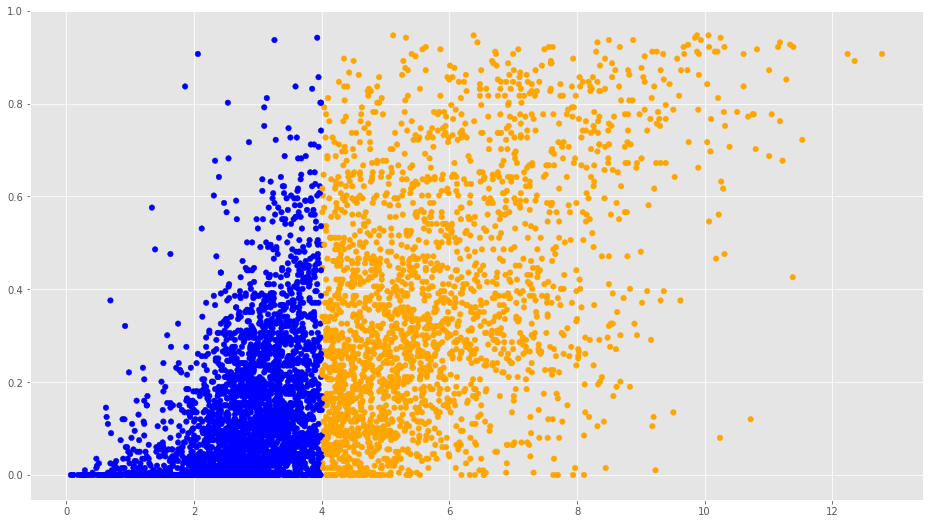

In [14]:
colores=['orange','blue']
tamanios=[30,60]
 
f1 = data['ws'].values
f2 = data['wp1'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['ws']>4):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [15]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
filtered_data = data
dataX =filtered_data[["ws"]]
X_train = np.array(dataX)
y_train = filtered_data['wp1'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.07773564]
Independent term: 
 -0.07496088913509266
Mean squared error: 0.03
Variance score: 0.40


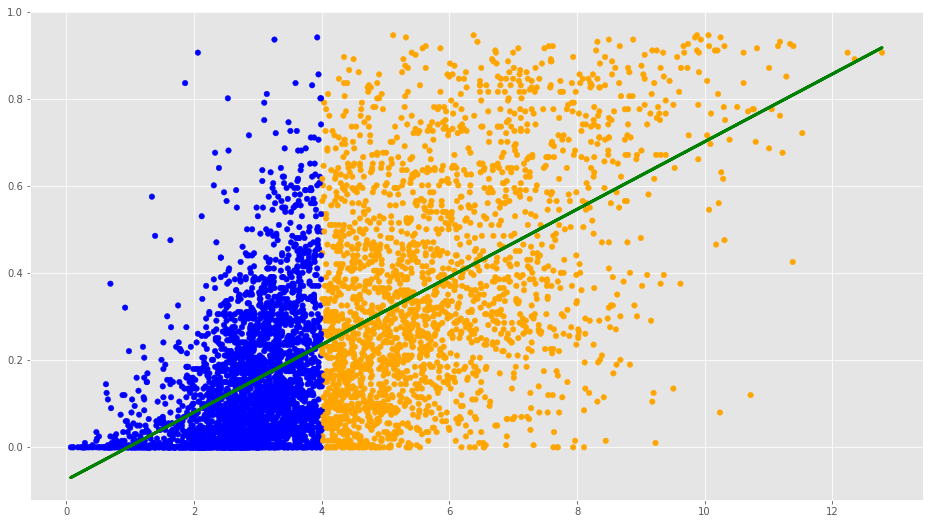

In [16]:
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
#plt.show()

plt.plot(X_train, y_pred, color='green',
linewidth=3, label=u'Regresión MCO')

In [40]:
#Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por un artículo con 144 wd,
# según nuestro modelo, hacemos:
5
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_12 = regr.predict([[13.85]])
print(y_12)

[1.0016777]


##### 